# 3 Виконання

## 3.1 Для дослідження даних, візуалізуйте їх. Виведіть зображення перших 24 і 36 цифр з набору

### Для початку завантажимо набір даних digits за допомогою функції load_digits з модуля sklearn.datasets, що повертає ою'єкт Bunch, що містить дані цифр.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

*Набір даних digits*

### Оскільки зображення - це двовімірний об'єкт, то вні володіє висотою та шириною у пікселях, то за дпомогою аотрибуту images виведемо матрицю для елементу з індексом 13. 

In [2]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

*Матриця двовимірного забраження*

### Алгоритми машинного навчання scikit-learn потребують, щоб зразки були збережені в двовимірному масиві значень з плаваючою точкою. Проте, ми маємо масив матриць чисел з плаваючою точкою, тобто тривимірний об'єкт. Однак функція load_digits повертає попередньо оброблені дані, які готові для машинного навчання. Набір даних Digits є числовим, тому load_digits просто перетворює двовимірний масив на одновимірний масив.

In [3]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

*Одновимірний масив зображення*

### Маємо, що перші вісім елементів - це елементи рядка з індексом 0, наступні вісім - з індексом 1 і так далі.

### Імпортуємо модуль matplotlib.pyplot та за допомогою методу imshow зобразимо перші 24 з 36 зображень. За допомогою методу ravel сплюснемо двовимірний масив осей до одновимірного та за допомогою zip одночасно ітеруємося як по осях, та і по картинках і їх назвах, тобто digits.target. Для зменшення padding'га між зображеннями застосуємо plt.tight_layout.

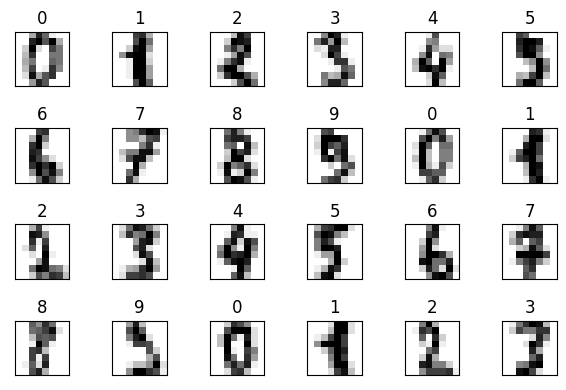

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()